# Handling data with pandas


## Motivation

So far we have encountered NumPy arrays as the only way to store numerical
data (we mostly ignored the built-in contains provided directly in Python).

However, while NumPy arrays are great for storing homogenous data which
does not have any particular structure, they are somewhat limited when
we want to use them for high-level data analysis.

For example, we usually want to process data sets with

1.  several variables
2.  multiple observations, which need not be identical across
    variables (imagine we have some missing values)
3.  non-homogenous data types: for examples,
    names need to be stored as strings, birthdays as dates and income as
    a floating-point number.

While NumPy can in principle handle such situations, it puts all the
burden on the user. Most users would prefer to not have to deal
with such low-level details.

Imagine we want to store names, birth dates and
annual income for two persons:

| Name | Date of birth | Income |
| ---- | ------------- | ------ |
| Alice | 1985-01-01   | 30,000 |
| Bob  | 1997-05-12    | -      |

No income was reported for Bob, so it's missing.
With NumPy, we could do this as follows:

In [1]:
import numpy as np
from datetime import date

date1 = date(1985, 1, 1)            # birth date for Alice
date2 = date(1997, 5, 12)           # birth date for Bob

data = np.array([['Alice', date1, 30000.0],
                 ['Bob', date2, None]])

data

array([['Alice', datetime.date(1985, 1, 1), 30000.0],
       ['Bob', datetime.date(1997, 5, 12), None]], dtype=object)

While we can create such arrays, they are almost useless for data analysis,
in particular since everything is stored as a generic `object`.

-   To be fair, NumPy offers an alternative array type called
    ["record" or "structured" array](https://numpy.org/doc/stable/user/basics.rec.html)
    which can handle fields of different data types,
    but the pandas library offers much more beyond that,
    so there is little reason to use it.

*Pandas* was created to offer more versatile data structures that are
much more straightforward to use for storing, manipulating and analysing
heterogenous data:

1.  Data is clearly organised in variables and observations, similar
    to econometrics programs such as Stata.
2.  Each variable is permitted to have a different data type.
3.  We can use *labels* to select observations, instead of having to use
    a linear numerical index as with NumPy.

    We could, for example, index a data set using National Insurance Numbers.
4.  Pandas offers many convenient data aggregation and reduction
    routines that can be applied to subsets of data.

    For example, we can easily group observations by city and compute average
    incomes.
5.  Pandas also offers many convenient data import / export functions that
    go beyond what's in NumPy.

Should we be using pandas at all times, then? No!

-   For low-level tasks where performance is essential, use NumPy.
-   For homogenous data without any particular data structure, use NumPy.
-   On the other hand, if data is heterogenous, needs to be imported from
    an external data source and cleaned or transformed before computations,
    use pandas.

There are numerous tutorials on pandas on the internet, so we will
keep this unit short and illustrate only the main concepts.
Useful references to additional material include:

-   The official user guide is available [here](https://pandas.pydata.org/docs/user_guide/index.html).
-   There is an official [pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
    which nicely illustrates the most frequently used
    operations.
-   The official API reference with details on
    every pandas object and function can be found
    [here](https://pandas.pydata.org/docs/reference/index.html).
-   There are numerous tutorials (including videos) freely available
    on the internet. See [here](https://pandas.pydata.org/docs/getting_started/tutorials.html)
    for a list.

***
## Creating pandas data structures

Pandas has two main data structures:

1.  `Series` represents observations of a single variable.
2.  `DataFrame` is a container for several variables. You can think
    of each individual column of a `DataFrame` as a `Series`.

The easiest way to get a `DataFrame` is to create it from pre-existing
data.

To access pandas data structures and routines, we need to import it first.
The near-universal convention is to make it available using the name `pd`:
```
import pandas as pd
```

*Examples:*

We can then create a `DataFrame` of a NumPy array:

In [2]:
import numpy as np
import pandas as pd             # universal convention: import using pd
from numpy.random import default_rng

# Draw normally distributed data
rng = default_rng(123)
data = rng.normal(size=(10,3))

# Create pandas DataFrame
varnames = ['A', 'B', 'C']
df = pd.DataFrame(data, columns=varnames)
df

,A,B,C
0,-0.989121,-0.367787,1.287925
1,0.193974,0.920231,0.577104
2,-0.636464,0.541952,-0.316595
3,-0.322389,0.097167,-1.525930
4,1.192166,-0.671090,1.000269
5,0.136321,1.532033,-0.659969
6,-0.311795,0.337769,-2.207471
7,0.827921,1.541630,1.126807
8,0.754770,-0.145978,1.281902
9,1.074031,0.392621,0.005114


This code creates a `DataFrame` of three variables called `A`, `B` and `C`
with 10 observations each.

Alternatively, we can create a `DataFrame` from non-homogenous data as follows:

In [3]:
names = ['Alice', 'Bob']
bdates = pd.to_datetime(['1985-01-01', '1997-05-12'])
incomes = np.array([35000, np.nan])         # code missing income as NaN

# create DataFrame from dictionary
df = pd.DataFrame({'Name': names, 'Birthdate': bdates, 'Income': incomes})
df

,Name,Birthdate,Income
0,Alice,1985-01-01,35000.0
1,Bob,1997-05-12,NaN


It data types differ across columns, as in the above example,
it is often convenient to create the `DataFrame` by passing
a dictionary as an argument, where each key contains a column name
and each corresponding value the data for that variable.

***
## Viewing data

With large data sets, you hardly ever want to print the entire `DataFrame`.
Pandas by default already limits that amount of data shown. You can
use the `head()` and `tail()` methods to explictly display a specific
number of rows from the top or the end of a `DataFrame`.

To illustrate, we will be using a data set of a few UK universities
that contains their name, number of students and budget in million pounds
(both from Wikipedia), and their [Times Higher Education (THE) ranking](https://www.timeshighereducation.com/world-university-rankings).

We can read in the data stored in `universities.csv` and display the
first three rows like this:

In [4]:
import pandas as pd

# Load sample data set of UK universities
df = pd.read_csv('../data/universities.csv', sep=';')
df.head(3)      # show first three rows

,Institution,Country,Founded,Students,Budget,Rank
0,University of Glasgow,Scotland,1451,30805,626.5,92
1,University of Edinburgh,Scotland,1583,34275,1102.0,30
2,University of St Andrews,Scotland,1413,8984,251.2,201


In [5]:
df.tail(3)      # show last three rows

,Institution,Country,Founded,Students,Budget,Rank
7,University of Cambridge,England,1209,23247,2192.0,6
8,University of Oxford,England,1096,24515,2450.0,1
9,University of Warwick,England,1965,27278,688.6,77


To quickly compute some descriptive statistics for the
*numerical* variables in the `DataFrame`, you can use `describe()`:

In [6]:
df.describe()

,Founded,Students,Budget,Rank
count,10.000000,10.000000,10.00000,10.000000
mean,1589.700000,23954.900000,970.04000,102.900000
std,312.364122,10103.058992,813.81164,126.190729
min,1096.000000,8984.000000,219.50000,1.000000
25%,1422.500000,16741.250000,332.07500,18.750000
50%,1539.000000,23881.000000,657.55000,53.500000
75%,1877.750000,29923.250000,1363.82500,156.500000
max,1965.000000,41180.000000,2450.00000,401.000000


If you want to see low-level information about the data type
used in each column, call `info()`:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Institution  10 non-null     object 
 1   Country      10 non-null     object 
 2   Founded      10 non-null     int64  
 3   Students     10 non-null     int64  
 4   Budget       10 non-null     float64
 5   Rank         10 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 608.0+ bytes


***
## Indexing

Pandas supports two types of indexing:

1.  Indexing by label, ie. by the values assigned to the row or column index.
    These labels need not be integers in increasing order, as is the case
    for NumPy.
2.  Indexing by position. This is very similar to slicing of NumPy arrays.

Pandas indexing is performed either by using brackets `[]`, or by using
`.loc[]` for label indexing, or `.iloc[]` for position indexing.

Indexing via `[]` can be somewhat confusing:

-   specifying `df['name']` returns the column `name` as a `Series` object.
-   On the other hand, specifying a range such as `df[5:10]` returns the *rows*
    associated with the *positions* 5,...,9.

*Examples:*

In [8]:
import pandas as pd

# Load sample data set of UK universities
df = pd.read_csv('../data/universities.csv', sep=';')
df['Institution']               # select a single column

0        University of Glasgow
1      University of Edinburgh
2     University of St Andrews
3       University of Aberdeen
4    University of Strathclyde
5                          LSE
6                          UCL
7      University of Cambridge
8         University of Oxford
9        University of Warwick
Name: Institution, dtype: object

In [9]:
df[['Institution', 'Rank']]     # select multiple columns using a list

,Institution,Rank
0,University of Glasgow,92
1,University of Edinburgh,30
2,University of St Andrews,201
3,University of Aberdeen,178
4,University of Strathclyde,401
5,LSE,27
6,UCL,16
7,University of Cambridge,6
8,University of Oxford,1
9,University of Warwick,77


To return the rows at positions 1, 2 and 3 we use

In [10]:
df[1:4]

,Institution,Country,Founded,Students,Budget,Rank
1,University of Edinburgh,Scotland,1583,34275,1102.0,30
2,University of St Andrews,Scotland,1413,8984,251.2,201
3,University of Aberdeen,Scotland,1495,14775,219.5,178


Pandas follows the Python convention that indices are 0-based, and the
endpoint of a slice is not included.

### Selection by label

We have already mentioned that pandas uses *labels* to index and align
data. These can be integer values starting at 0 with increments of 1
for each additional element, but they need not be.

For example, we can replace the row index and use the labels `a`, `b`, `c`, ...
instead of integers as follows:

In [11]:
import pandas as pd
df = pd.read_csv('../data/universities.csv', sep=';')

# Map list of integers to roman letters
index = [chr(97+i) for i in df.index.values]
index

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [12]:
df['index'] = index     # create new column 'index'
df.set_index(keys=['index'], inplace=True)      # set letters as index!
# print first 3 rows using labels
df['a':'c']             # This is the same as df[:3]

,Institution,Country,Founded,Students,Budget,Rank
index,,,,,,
a,University of Glasgow,Scotland,1451,30805,626.5,92
b,University of Edinburgh,Scotland,1583,34275,1102.0,30
c,University of St Andrews,Scotland,1413,8984,251.2,201


To add to the confusion, note that when specifying a range in terms of
labels, the last element *is* included!


To more clearly distinguish between selection by label and by position,
pandas provides the `.loc[]` and `.iloc[]` methods of indexing.
To make your intention obvious, you should therefore adhere to the following
rules:

1.  Use `df['name']` only to select *columns* and for nothing else.
2.  Use `.loc[]` to select by label.
3.  Use `.iloc[]` to select by position.

To illustrate, using `.iloc[]` unambibguously indexes by label:

In [13]:
df.loc['a':'c', ['Institution', 'Students']]

,Institution,Students
index,,
a,University of Glasgow,30805
b,University of Edinburgh,34275
c,University of St Andrews,8984


With `.loc[]` we can even perform slicing on column names, which
is not possible with the simpler `df[]` syntax:

In [14]:
df.loc['a':'c', 'Students':'Rank']

,Students,Budget,Rank
index,,,
a,30805,626.5,92
b,34275,1102.0,30
c,8984,251.2,201


This includes all the columns between `Students` and `Rank`,
where the latter is again included since we are slicing by label.

Trying to pass in positional arguments will return an error if the
index does not happen to be of type integer and the given values
are actual labels:

In [15]:
df.loc[0:4]

TypeError: cannot do slice indexing on Index with these indexers [0] of type int

Somewhat surprisingly, we can also pass boolean arrays to `.loc[]`
even though these are clearly not labels:

In [ ]:
df.loc[df['Country'] == 'Scotland']

Indexing via `.loc[]` supports a few more types of arguments,
see the [official documentation](https://pandas.pydata.org/docs/user_guide/indexing.html#selection-by-label)
for details.

### Selection by position

Conversely, if we want to select items exclusively by their position
and ignore their labels, we use `.iloc[]`:

In [ ]:
df.iloc[0:4, 0:2]           # select first 4 rows, first 2 columns

Again, `.iloc[]` supports a multitude of other arguments,
including boolean arrays. See the [official documentation](https://pandas.pydata.org/docs/user_guide/indexing.html#selection-by-position)
for details.


***
## Aggregation and reduction

### Working with entire DataFrames

The simplest way to invoke data reduction is to invoke the desired
routine on the entire `DataFrame`:

In [ ]:
import pandas as pd

df = pd.read_csv('../data/universities.csv', sep=';')
df.mean()

Methods such as `mean()` are by default applied column-wise to each
numerical column.

One bid advantage over NumPy is that missing values (represented
by `np.nan`) are automatically ignored:

In [ ]:
# Set Aberdeen's THE ranking to missing
df.loc[df['Institution'] == 'University of Aberdeen', 'Rank'] = np.nan
df.loc[df['Institution'] == 'University of Aberdeen']

In [ ]:
# mean() automatically drops missing observations
df.mean()

### Splitting and grouping

Applying aggregation functions to the entire `DataFrame` is simular
to what we can do with NumPy. The added flexibility of pandas
becomes obvious once we want to apply these functions to subsets of
data, ie groups, which we can define based on values or index labels.

For example, we can easily group our university data by country:

In [ ]:
import pandas as pd

df = pd.read_csv('../data/universities.csv', sep=';')

groups = df.groupby(['Country'])

Here `groups` is a special pandas objects which can be subsequently be
used to process group-specific data. To compute the group-wise
averages, we can simply run

In [ ]:
groups.mean()

Groups support column indexing. If we want to only compute the
total number of students for the Scottish and English universities
in our sample, we can do this as follows:

In [ ]:
groups['Students'].sum()

There are numerous routines available to aggregate grouped data,
for example:

-   `mean()`, `sum()`: averages and sum over numerical items within groups.
-   `std()`, `var()`: within-group std. dev. and variance
-   `size()`: group sizes
-   `first()`, `last()`: first and last elements in each group
-   `min()`, `max()`: minimum and maximum elements within a group

*Examples:*

In [ ]:
groups.size()       # return number of elements in each group

In [ ]:
groups.first()      # return first element in each group

You can create custom aggregation routines by calling `agg()`
or `aggregate()` on the grouped object. To illustrate, we
count the number of universities in each country that have more
than 20,000 students:

In [ ]:
groups['Students'].agg(lambda x: np.sum(x >= 20000))

Note that we called `agg()` only on the column `Students`, otherwise
the function would be applied to every column separately, which is not
what we want.

The most flexible aggregate function is `apply()`, which calls the
given function with the entire group-specific subset of data (including
all columns) and glues together the results.

For example, if we want to compute the average budget per student
(in pounds) in Scotland and England, we can do this as follows:

In [ ]:
groups.apply(lambda x: x['Budget'].sum() / x['Students'].sum() * 1.0e6)

We couldn't have done this with `agg()` since `agg()` never gets to see
the entire chunk of data, but only one column at a time.

This section provided only a first look at pandas's "split-apply-combine"
functionality implemented via `groupby`. See the [official documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
for more details.

***
## Visualisation

We covered plotting with Matplotlib in earlier units. Pandas itself
implements some convenience wrappers around Matplotlib plotting routines
which allow us to quickly inspect data stored in `DataFrames`.
We can or course alternatively extract the numerical data add pass it
to Matplotlib's routines instead.

For example, to plot student numbers as a bar chart, we can directly
use Pandas:

In [ ]:
import pandas as pd

df = pd.read_csv('../data/universities.csv', sep=';')

# set institution as label so they automatically show up in plot
df2 = df.set_index(keys=['Institution'])
df2['Students'].plot(kind='bar')

Alternatively, we can construct the graph using Matplotlib ourselves:

In [ ]:
import matplotlib.pyplot as plt

labels = df['Institution'].to_list()        # labels as list
values = df['Students'].to_numpy()          # data as NumPy array
plt.bar(labels, values)
plt.tick_params(axis='x', labelrotation=90)

Sometimes Matplotlib's routines directly work with pandas's data structures,
sometimes they don't. We can convert a `DataFrame` or `Series` object
to a NumPy array using the `to_numpy()` method, and convert a `Series`
to a Python list using `to_list()`, as illustrated in the example above.


To plot timeseries-like data, we can use the `plot()` method,
which optionally accepts arguments to specify which columns
should be used for the x-axis and which for the y-axis:

In [ ]:
import numpy as np
import pandas as pd

# Instantiate RNG
rng = np.random.default_rng(123)

# Create pandas DataFrame
nobs = 50
df = pd.DataFrame({'A': np.arange(nobs), 'B': rng.normal(size=nobs)})

df.plot(x='A', y='B')       # plot A on x-axis, B on y-axis

To quickly generate some descriptive statistics, we can use
the built-in box plot:

<AxesSubplot:>

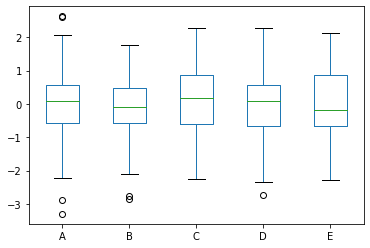

In [16]:
import numpy as np
import pandas as pd

# Instantiate RNG
rng = np.random.default_rng(123)

# Create pandas DataFrame
df = pd.DataFrame(rng.normal(size=(100, 5)),
                  columns=['A', 'B', 'C', 'D', 'E'])

df.plot.box()           # same as df.plot(kind='box)

Similarly, you can generate scatter plots, plotting one column
against another:

<AxesSubplot:xlabel='A', ylabel='E'>

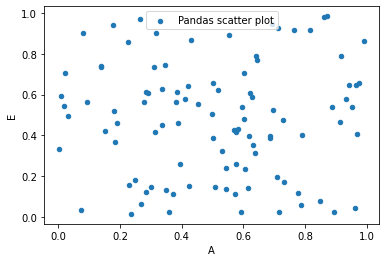

In [24]:
# Create pandas DataFrame
df = pd.DataFrame(rng.uniform(size=(100, 5)),
                  columns=['A', 'B', 'C', 'D', 'E'])

df.plot.scatter(x='A', y='E', label='Pandas scatter plot')

<AxesSubplot:xlabel='A', ylabel='E'>

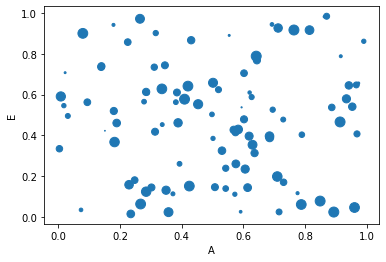

In [25]:
# You can even use a column to specify the dot size!
df.plot.scatter(x='A', y='E', s=df['B']*100.0)

In general, the wrappers implemented in Pandas are useful to
get an idea how the data looks like. For reusable code or more
complex graphs you'll usually want to directly use Matplotlib
and pass the data convert to NumPy arrays.

***
# Exercises


***
# Solutions